In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

PATH = "physionet.org/files/sleep-accel/1.0.0/heart_rate"

In [2]:
def process_file(file):
    data = pd.read_csv(PATH + "/" + file, ",", header=None, names=['second', 'bpm'])
    
    data.drop_duplicates(keep='first', inplace=True) 
    
    data = data[data["second"] >= 0]
    data.reset_index(drop=True, inplace=True)
    
    max = data["second"].max()
    min = data["second"].min()

    tot_seconds = int(max - min)
       

    minutes_sample_rates = []
    minute = 0
    minute_count = 0
    
    for index, row in data.iterrows():
        second = row["second"]
        if second > (minute + 1) * 60:
            minutes_sample_rates.append(minute_count)
            minute_count = 0
            minute += 1

            while second > (minute + 1) * 60:
                minutes_sample_rates.append(minute_count)
                minute += 1
            
        minute_count += 1
    
    if minute_count > 0:
        minutes_sample_rates.append(minute_count)
    
    
    print(file, data.shape[0], tot_seconds, int(tot_seconds / 3600), len(minutes_sample_rates))

    plt.figure(figsize=(12,6))
    plt.plot(data['bpm'])
    plt.show()
    

8000685_heartrate.txt 5792 30046 8 501


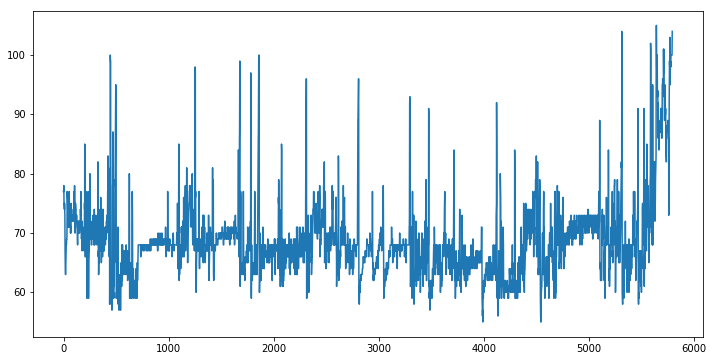

6220552_heartrate.txt 5875 30369 8 507


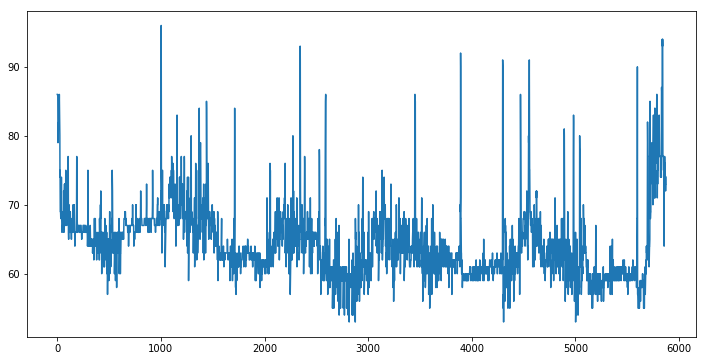

8686948_heartrate.txt 5760 29919 8 499


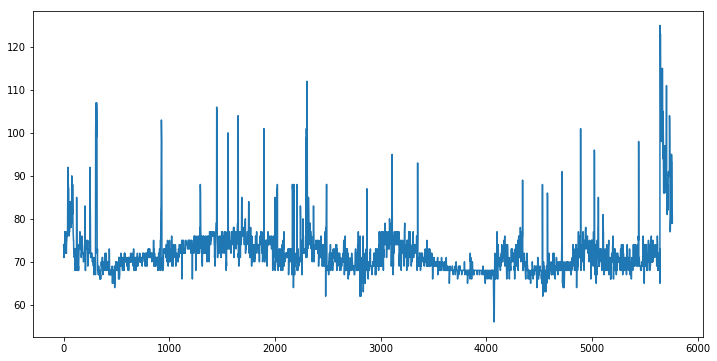

1066528_heartrate.txt 4968 34484 9 575


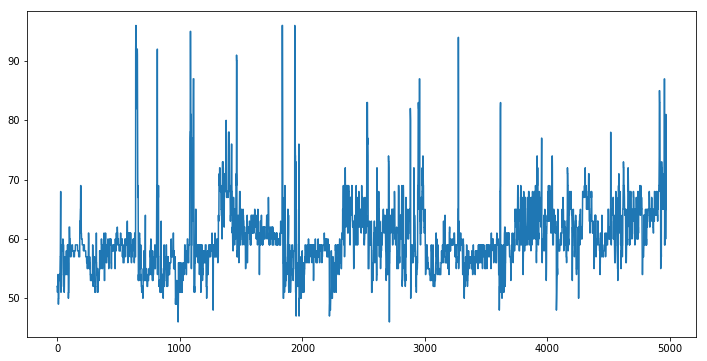

844359_heartrate.txt 5548 28991 8 484


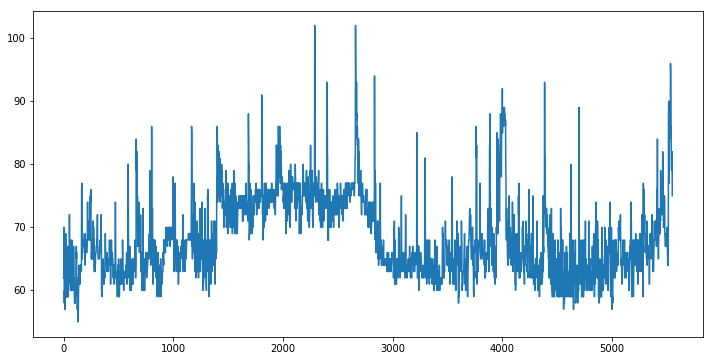

1818471_heartrate.txt 5972 31022 8 518


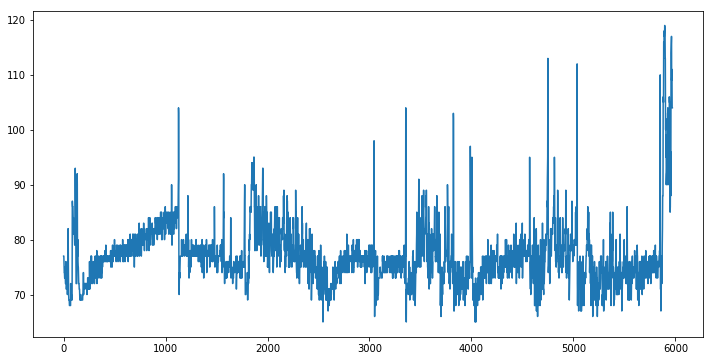

3997827_heartrate.txt 5741 29621 8 494


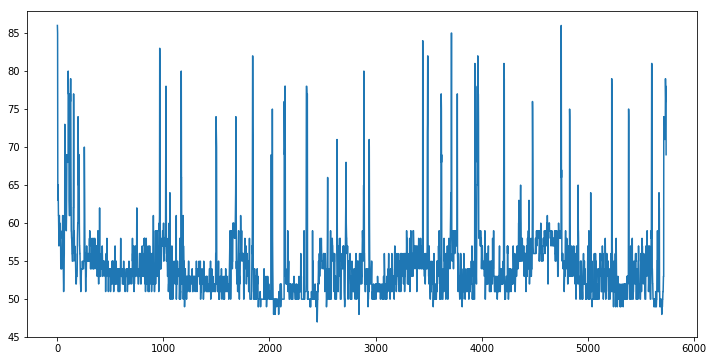

1360686_heartrate.txt 5632 29309 8 489


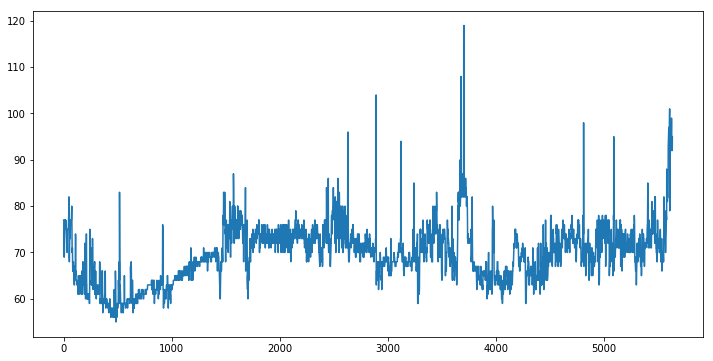

5498603_heartrate.txt 4485 23265 6 388


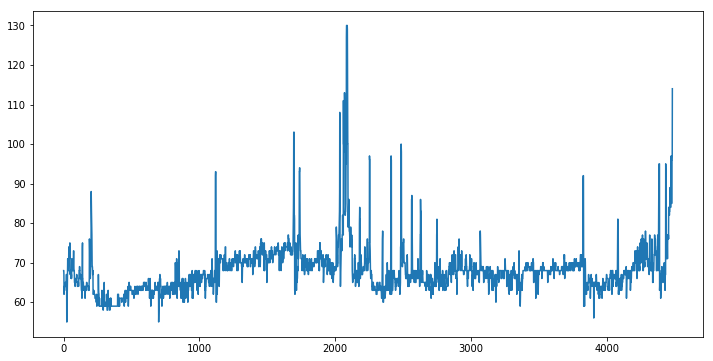

781756_heartrate.txt 5825 37540 10 626


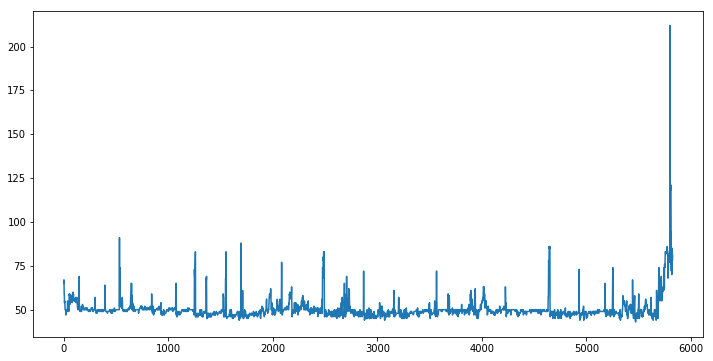

2598705_heartrate.txt 5458 30138 8 503


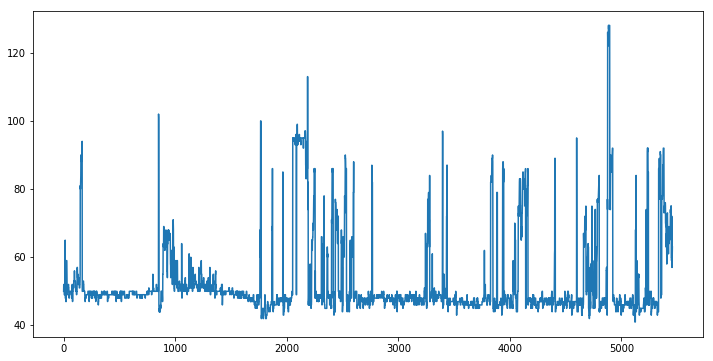

2638030_heartrate.txt 5757 30209 8 504


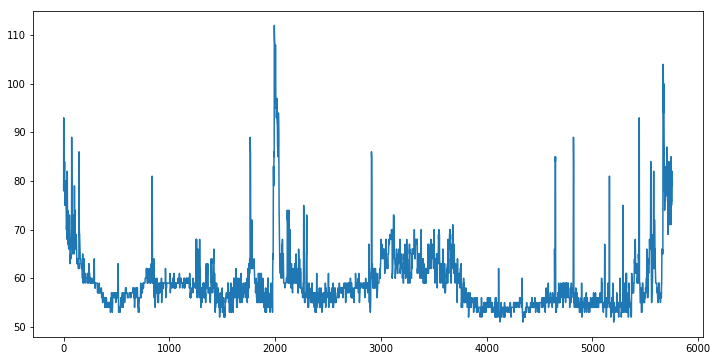

9961348_heartrate.txt 5355 29241 8 488


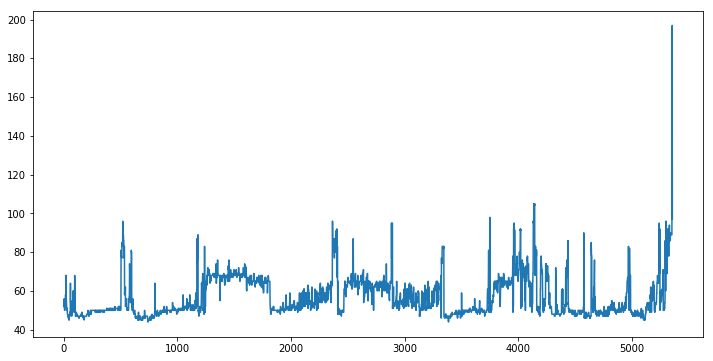

7749105_heartrate.txt 840 29642 8 495


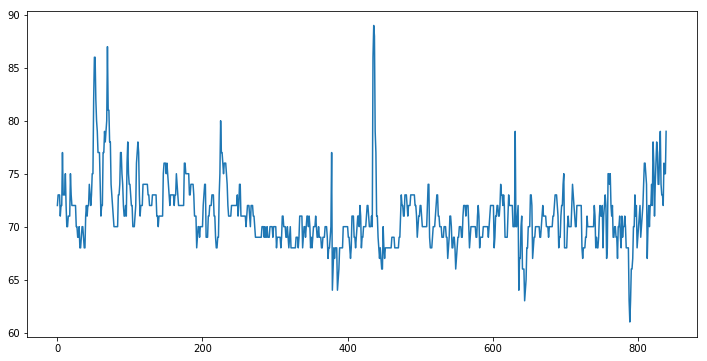

4426783_heartrate.txt 5677 29588 8 494


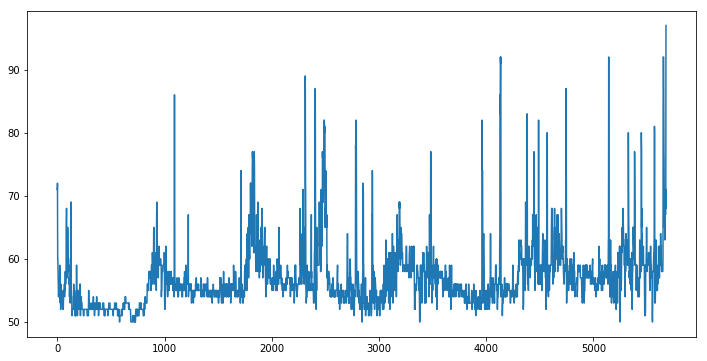

4314139_heartrate.txt 5636 29611 8 494


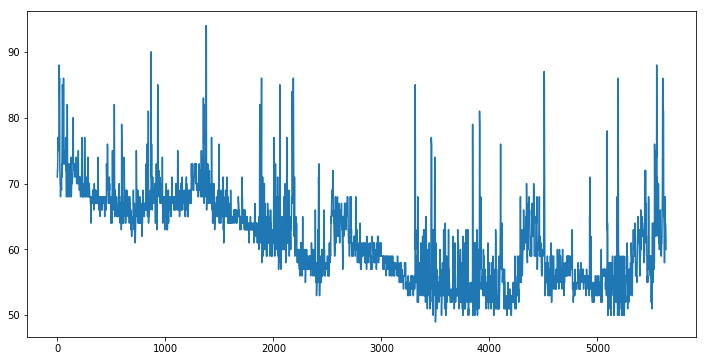

9618981_heartrate.txt 5426 28346 7 473


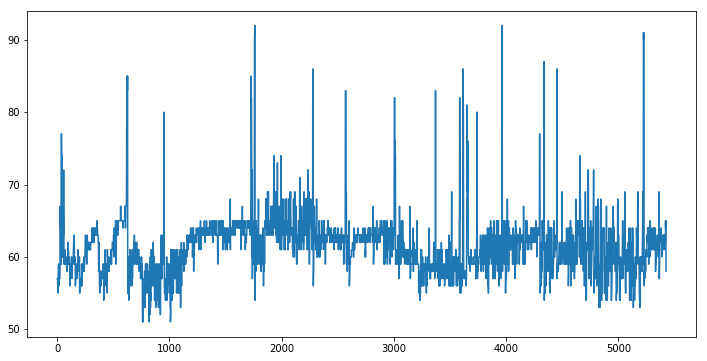

759667_heartrate.txt 2849 14237 3 238


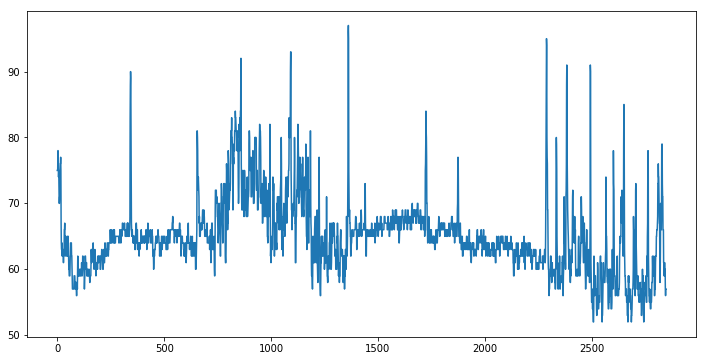

46343_heartrate.txt 3302 16971 4 284


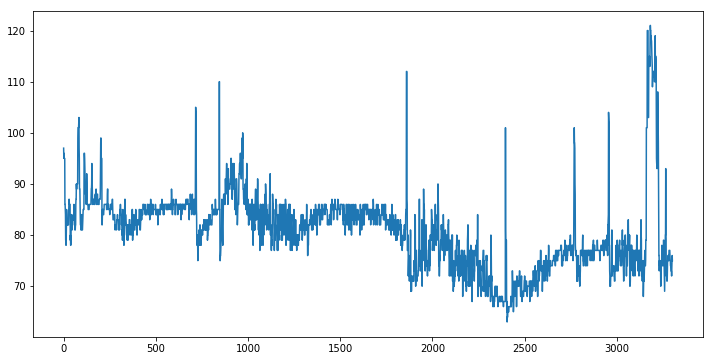

9106476_heartrate.txt 5783 30084 8 502


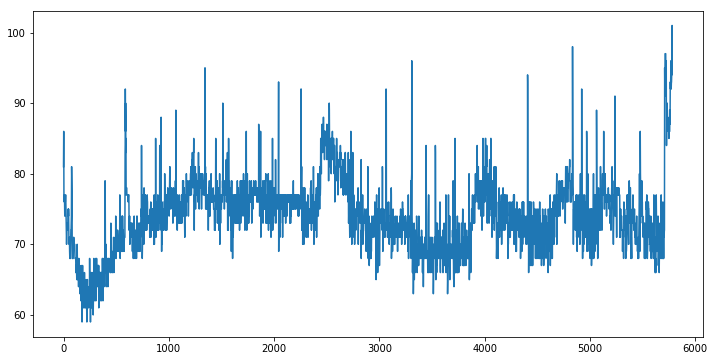

8173033_heartrate.txt 5845 30553 8 510


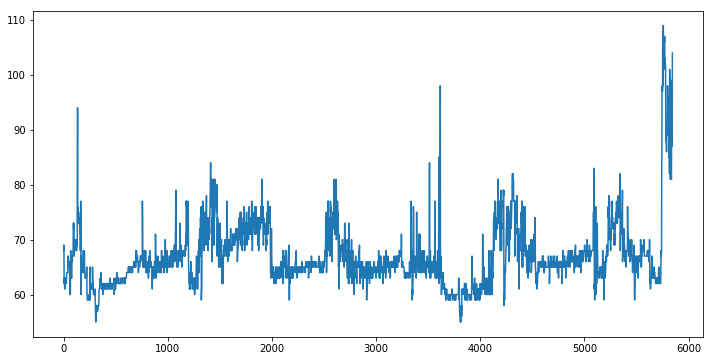

8692923_heartrate.txt 5628 29397 8 491


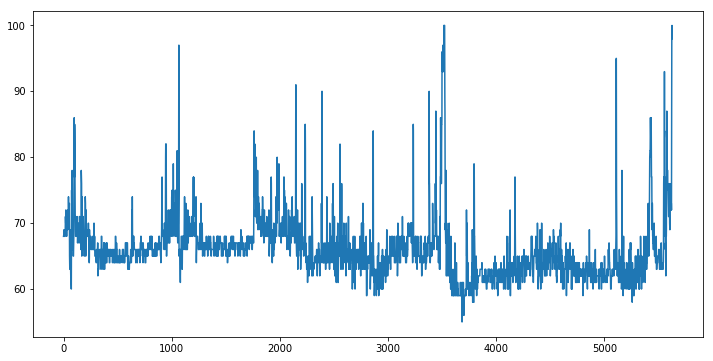

5132496_heartrate.txt 2790 13940 3 233


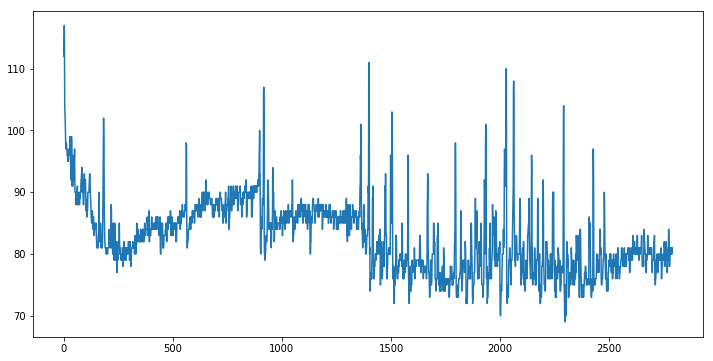

1455390_heartrate.txt 5857 30411 8 507


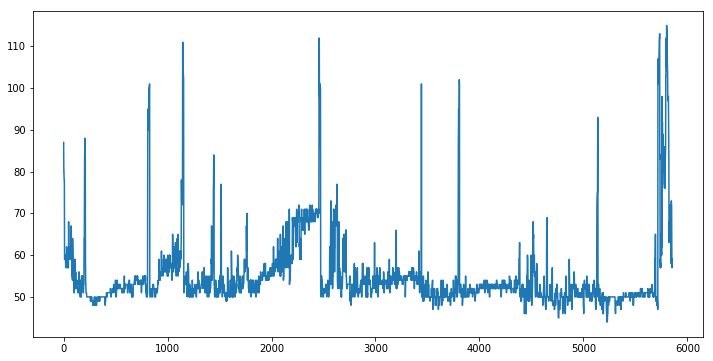

3509524_heartrate.txt 2501 12496 3 209


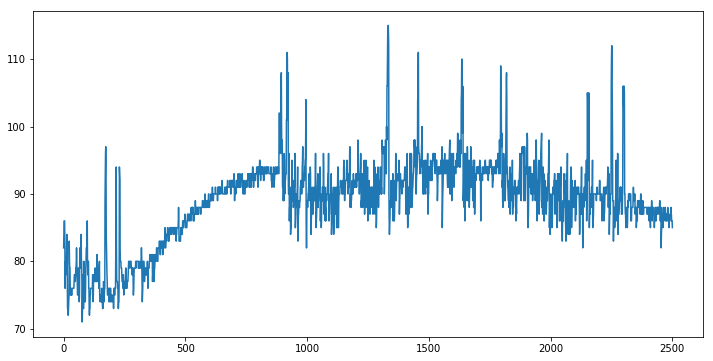

8258170_heartrate.txt 5660 30394 8 507


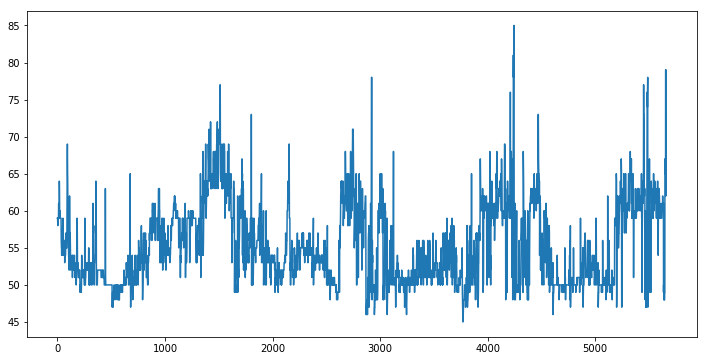

4018081_heartrate.txt 3072 15354 4 256


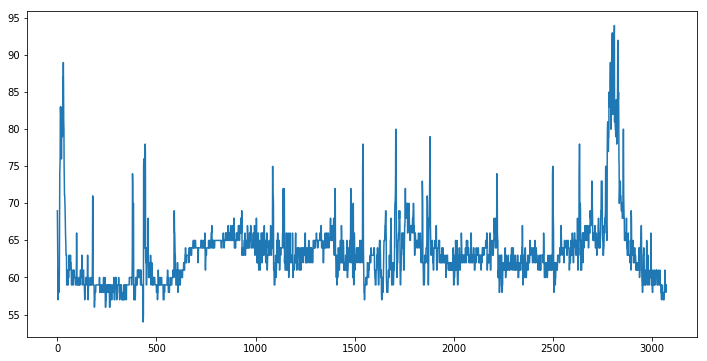

5797046_heartrate.txt 5588 28844 8 481


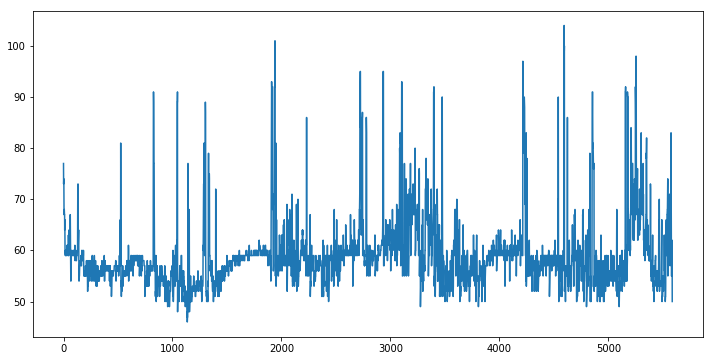

8530312_heartrate.txt 5659 29638 8 495


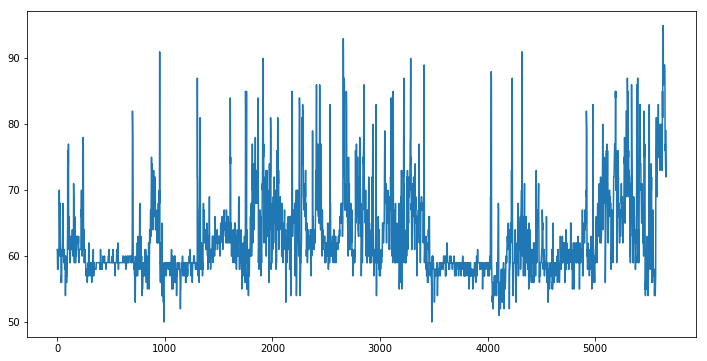

5383425_heartrate.txt 5694 29888 8 499


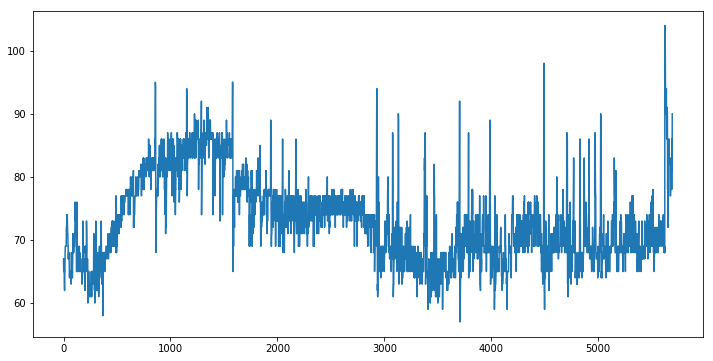

1449548_heartrate.txt 5675 31617 8 528


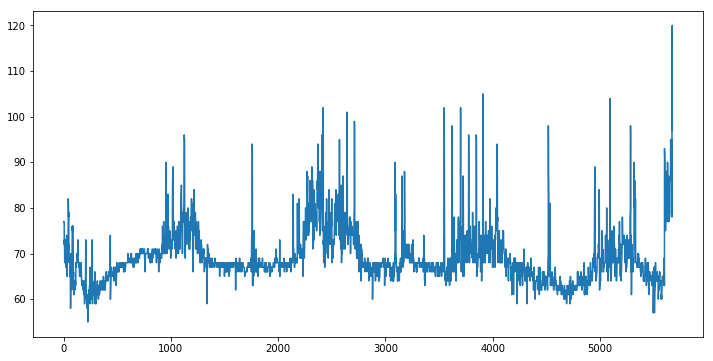

In [3]:
for file in os.listdir(PATH):
    if file.endswith(".txt"):
        process_file(file)